# SOK-1006 V24

## Forelesning 12 - Fortjenestemaksimering II - Lang sikt

På kort sikt var minst én produksjonsfaktor fast. I tillegg kunne ikke antall produsenter i markedet endres. På lang sikt kan bedriftene velger optimale nivå på alle innsatsfaktorer, og nye kan komme til dersom eksisterende bedrifter tjener "for mye" i forhold til normal fortjeneste. Vi skal se på hvordan dette påvirker produkttilbud og faktoretterspørsel på lang sikt.

### 1. Tilbud på lang sikt

På lang sikt skriver vi fortjenesten som en funksjon av produsert mengde som før $F(x)$:

$$F(x)=px-C(x).\tag{1}$$

Vi kan se at fortjeneste er positiv dersom 

$$F(x)>0 \Rightarrow p>\overline{C}(x).\tag{2}$$

Førsteordensbetingelsen for et maksimum er

$$F'(x)=p-C'(x)=0\Rightarrow p=C'(x). \tag{3}$$

Andre ordensbetingelsen for et maksimum må også være oppfylt:

$$F''(x)=-C''(x)<0\Rightarrow C''(x)>0. \tag{4}$$

Dette sier at grensekostnaden må være økende i maksimumspunktet.     

Maksimering av fortjenesten på lang sikt følger dermed samme prinsipp som på kort sikt. Det som er annerledes er at nye bedrifter kan komme til dersom eksisterende tjener mer enn normal fortjeneste. Tenk på en bedriftseier som investerer kapital; når bedriften har et overskudd på 0 får denne eieren en avkastning på $r$ per enhet, og dette er da en normalavkastning. Går bedriften med overskudd får eieren en renprofitt som git en avkastning utover $r$. Dette lokker andre bedrifter inn på markedet.       

Se på figuren under (Fig 6.4 i boka). Det er den delen av grensekostnad som ligger over gjennomsnittskostnad som er bedriftens tilbud. Dersom prisen er $p_0$ vil bedriften produsere i punkt *b* med mengde $X_2$. Avstanden mellom *hg* viser hvor mye profitt som tjenes per enhet solgt. Areal *hbdg* angir da renprofitten som lokker andre produsenter inn på markedet. Dette gir en økning i markedstilbud (markedstilbud flyttes til høyre, noe som presser prisen ned). Når prisen er presset ned til $p_1$ produserer bedriften i punkt *i* med mengde $X_1$. Her er fortjenesten lik null, og bedriften oppnår en normal avkastning på kapitalen. Det er ikke lenger insentiv for nye bedrifter å komme inn på markedet, og vi har funnet en likevekt.


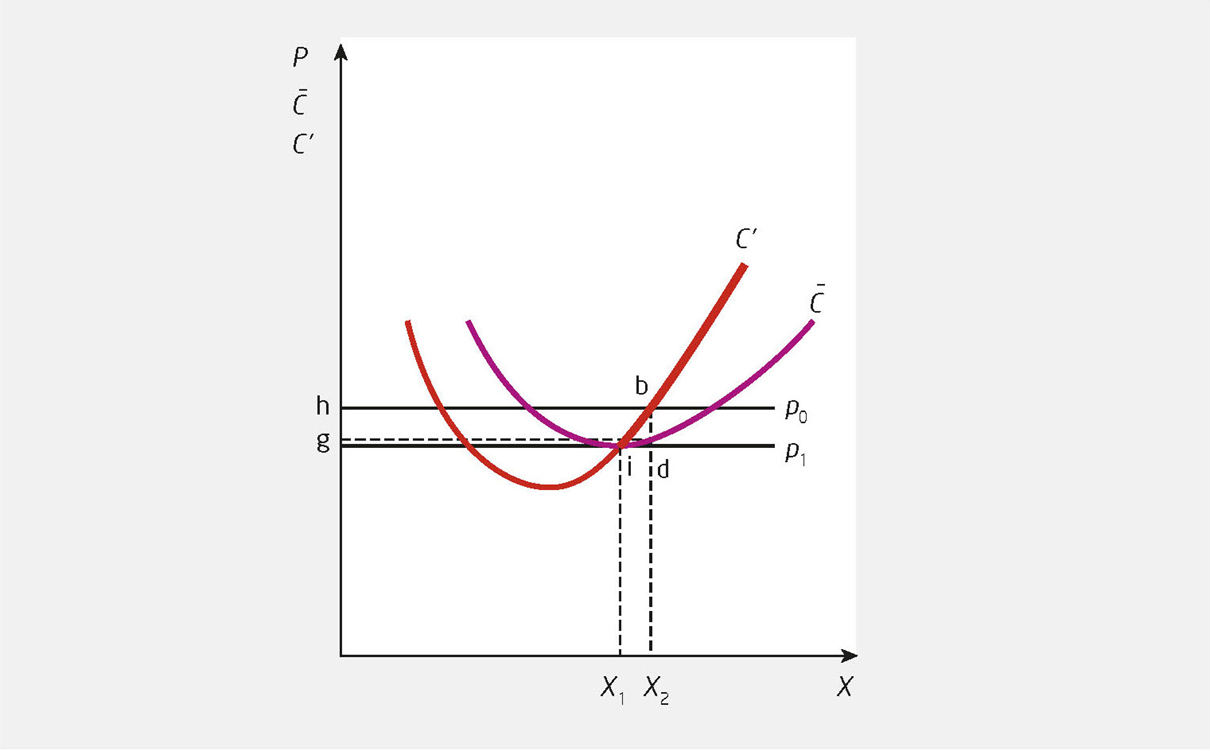

Fig 6.5 under viser tilbudet på lang sikt. Figuren likner den som vi utledet på kort sikt, men husk at bak figuren under har vi en optimal tilpasning av alle innsatsfaktorer (mens på kort sikt var minst én faktor fast).

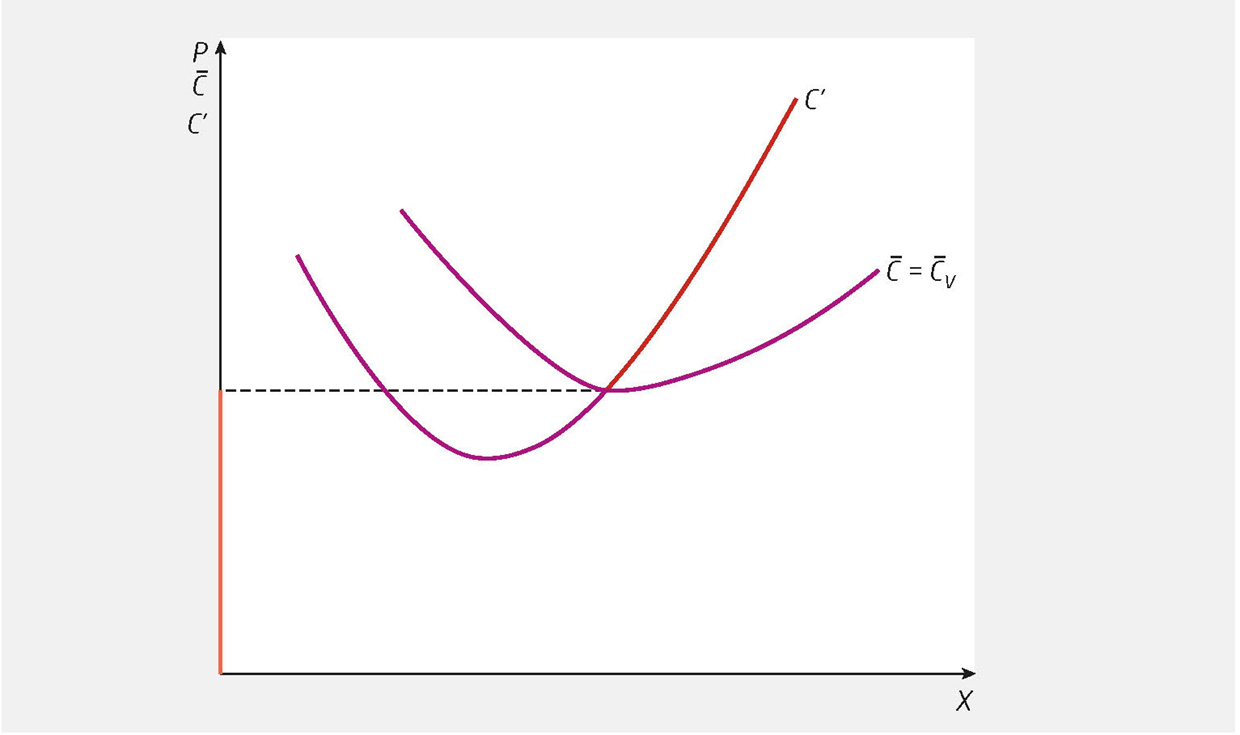

### 2. Tilpasningen i faktormarkedet på lang sikt

La oss anta at bedriften produserer en vare av Arbeidskraft (N) og Kapital (K). På lang sikt kan begge innsatsfaktorene bestemmes av bedriften for å maksimere fortjenesten.          

**Oppskrift for fortjenestemaksimering på lang sikt**        
         

1. Sett opp fortjenestesfunksjonen på lang sikt:     
$$ F(N, K) = p f(N, K) - (rK + w N)\tag{5}$$

hvor $f(N, K)$ er produktfunksjonen på lang sikt, $rK$ er kapitalkostnader og $wN$ er lønnskostnader.         

2. Sett opp førsteordensbetingelsene, én for hver faktor:
$$ F'_N = p f'_N - w = 0\Rightarrow p f'_N = w  \tag{6}$$
$$ F'_K = p f'_K - r = 0\Rightarrow p f'_K = r  \tag{7}$$

Venstresiden i (6) og (7) er *verdien av grenseproduktet* til faktoren, og høyresiden er dens *grensekostnad*.        

3. Del (6) på (7) for å finne det relative forholdet mellom faktorene (*substitumalen*):

$$ \frac {f'_N}{f'_K} = \frac {w}{r}  \tag{8}$$

4. Løsningen til (8) er $K(N)$ eller $N(K)$, dvs et relativt forhold. Denne løsningen byttes inn i (6) eller (7).

5. Løsningen er $N(w, r, p)$, og $K(w, r, p)$ dvs optimal mengde arbeidskraft og kapital etterspurt på lang sikt. Legg merke til at disse løsninger er kun avhengig av de eksogent gitte størrelser (pluss evt eksogene parametre fra produktfunksjonen).       

6. Vi må sjekke at vi har funnet et maksimum, og at fortjenesten er positiv. For maksimering med to variabler får vi 3 andreordensbetingelser (kun 2 av disse er nevnt i boka på s. 188). Vi angir andreordens partielle deriverte som $f''_{NN}, f''_{KK}, f''_{NK}, f''_{KN}$ hvor $f''_{NK}=f''_{KN}$ (Youngs setning). Da kan vi skrive AOB for et maksimum som: 

$$f''_{NN}<0 \tag{9}$$
$$f''_{KK}<0 \tag{10}$$
$$f''_{NN}f''_{KK}-f''_{NK}f''_{KN} > 0 \tag{11}$$

Vi kan til slutt sjekke at fortjenesten er positiv ved å beregne den i maksimumspunktet.

#### 2.1 Cobb-Douglas produktfunksjon - generell analyse
Vi antar følgende produktfunksjon $x = N^{a}K^{b}$, og setter opp problemet på generelt vis med produktpris, timelønn, og kapitalkostnad som $p, w, r$.


In [2]:
import sympy as sp
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# definer symboler
x, N, K, a, b, p, w, r = sp.symbols('x N K a b p w r', real=True, positive=True)

In [4]:
# definer funksjoner i Steg 1
def prod(N,K,a,b):
    return N**a*K**b

def profitt(p,N,K,a,b,w,r):
    return p*prod(N,K,a,b)-w*N-r*K

In [5]:
# førsteordensbetingelser i Steg 2
# gp = grenseprofitt

gp_N = sp.diff(profitt(p,N,K,a,b,w,r),N)
gp_K = sp.diff(profitt(p,N,K,a,b,w,r),K)

foc_N = sp.Eq(gp_N,0)
foc_K = sp.Eq(gp_K,0)
display(foc_N)
display(foc_K)

Eq(K**b*N**a*a*p/N - w, 0)

Eq(-r + K**b*N**a*b*p/K, 0)

In [6]:
# Steg 3 - la oss se hva som er hva i disse uttrykkene
display (gp_N.args)
display (gp_K.args)

(-w, K**b*N**a*a*p/N)

(-r, K**b*N**a*b*p/K)

In [7]:
# da kan vi skrive Steg 3 som
display(gp_N.args[0]/gp_K.args[0])
display(gp_N.args[1]/gp_K.args[1])



w/r

K*a/(N*b)

In [8]:
steg_3 = sp.Eq(gp_N.args[0]/gp_K.args[0], gp_N.args[1]/gp_K.args[1])
steg_3

Eq(w/r, K*a/(N*b))

In [9]:
# finn K som funksjon av N
K_N = sp.solve(steg_3,K)[0]
K_N

N*b*w/(a*r)

Det relative forholdet mellom kapital og arbeidskraft er $K=\frac{b}{a}\frac{w}{r}N$ og bestemmes av teknologien (første element) og den relative prisen på arbeidskraft. Blir arbeidskraft relativ dyrere, økes etterspørsel etter kapital relativ til arbeidskraft. Det samme skjer dersom kapitalens produksjonselastisitet øker relativ til produksjonselastisiteten til arbeidskraft. Denne likningen er substitimalen, og er en rett linje med helning $\frac{b}{a}\frac{w}{r}$ i en figur med K på den vertikal aksen, og N på den horisontale.

Vi kan løse begge FOC samtidig, men får ikke et fint uttrykk.

In [24]:
løsning = sp.solve([gp_N,gp_K],[N,K])
løsning

[(exp(log(a**(b - 1)*r**b*w**(1 - b)/(b**b*p))/(a + b - 1)),
  (w*exp(log(a**(b - 1)*r**b*w**(1 - b)/(b**b*p))/(a + b - 1))**(1 - a)/(a*p))**(1/b))]

Sympy sliter med å finne en endelig løsning etter at man har byttet info fra substitumalen inn i førsteordensbetingelser. La oss da prøve en annen tilnærming. Legg merke til at vi kan skrive de førsteordensbetingelsene som følger:
$$\frac{ap}{N}x=w \tag{12}$$
$$\frac{bp}{K}x=r \tag{13}$$

Her har vi byttet $x=N^aK^b$ inn i de førsteordensbetingelsene. Vi kan nå finne N og K som en funksjon av x:
$$N=\frac{ap}{w}x \tag{14}$$
$$K=\frac{bp}{r}x \tag{15}$$

Nå kan vi beregne bedriftens *tilbud* ettersom $x=N^aK^b$.



In [11]:
prod(a*p*x/w,b*p*x/r,a,b)

(a*p*x/w)**a*(b*p*x/r)**b

Da har vi
$$x=\left(\frac{ap}{w}\right)^a\left(\frac{bp}{r}\right)^bx^{a+b}$$
som vi kan løse for x:

$$\frac{x}{x^{a+b}}=x^1x^{-(a+b)}= x^{1-a-b}=\left(\frac{ap}{w}\right)^a\left(\frac{bp}{r}\right)^b.$$

Videre:
$$\left(x^{1-a-b}\right)^{\frac{1}{1-a-b}}=\left(\frac{ap}{w}\right)^{\frac{a}{1-a-b}}\left(\frac{bp}{r}\right)^{\frac{b}{1-a-b}}=\left(\frac{a}{w}\right)^{\frac{a}{1-a-b}}\left(\frac{b}{r}\right)^{\frac{b}{1-a-b}}p^{\frac{a+b}{1-a-b}}=x\tag{16}.$$

Legg merke til at (16) gir bedriftens tilbud på lang sikt, og at det er en funksjon kun av eksogent gitte parametre (det er slik vi vet at vi har funnet en løsning!). Nå kan vi sette (16) inn i (14) og (15) for å finne etterspørsel etter arbeidskraft og kapital på lang sikt:

$$N=\left(\frac{a}{w}\right)^{\frac{1-b}{1-a-b}}\left(\frac{b}{r}\right)^{\frac{b}{1-a-b}}p^{\frac{1}{1-a-b}} \tag{17}$$
$$K=\left(\frac{a}{w}\right)^{\frac{a}{1-a-b}}\left(\frac{b}{r}\right)^{\frac{1-a}{1-a-b}}p^{\frac{1}{1-a-b}} \tag{18}$$
$$x=\left(\frac{a}{w}\right)^{\frac{a}{1-a-b}}\left(\frac{b}{r}\right)^{\frac{b}{1-a-b}}p^{\frac{a+b}{1-a-b}}\tag{19}$$

Løsningen på langt sikt er gitt ved (17), (18) og (19).

Vi må passe på at løsningen er et maksimum (dvs sjekke andreordensbetingelser), og at fortjenesten er positiv.

**Andreordensbetingelser**



In [12]:
# definer andreordens deriverte til produktfunksjonen:
f_NN = sp.diff(prod(N,K,a,b),N,N)
f_KK = sp.diff(prod(N,K,a,b),K,K)
f_NK  = sp.diff(prod(N,K,a,b),N,K)
display(f_NN)
display(f_KK)


K**b*N**a*a*(a - 1)/N**2

K**b*N**a*b*(b - 1)/K**2

Andreordensbetingelsene i (9) og (10) betyr $a<1,b<1$. La oss sjekke (11)

In [13]:
aob_3=sp.simplify(f_NN*f_KK-(f_NK)**2)
aob_3

K**(2*b - 2)*N**(2*a - 2)*a*b*(-a - b + 1)

For at (11) skal være oppfylt må $1>a+b$, dvs produktfunksjonen må vise avtakende skalautbytte. (Husker du hvorfor?).

**Positiv fortjeneste**
La oss definere x, N, K og sjekke:


In [14]:
def N_eq(p,a,b,w,r):
    return (a/w)**((1-b)/(1-a-b))*(b/r)**(b/(1-a-b))*p**(1/(1-a-b))
def K_eq(p,a,b,w,r):
    return (a/w)**(a/(1-a-b))*(b/r)**((1-a)/(1-a-b))*p**(1/(1-a-b))
def x_eq(p,a,b,w,r):
    return (N_eq(p,a,b,w,r))**a*(K_eq(p,a,b,w,r))**b

def fortjeneste_eq(p,a,b,w,r):
    return (p*x_eq(p,a,b,w,r)-w*N_eq(p,a,b,w,r)-r*K_eq(p,a,b,w,r))
sp.simplify(fortjeneste_eq(p,a,b,w,r))

(-a*p**(1/(a + b - 1))*r*w + a**(a/(a + b - 1))*b**(b/(a + b - 1))*p**(1 + 2/(a + b - 1))*r**((a - 1)/(a + b - 1))*w**((b - 1)/(a + b - 1))*(b**((a - 1)/(a + b - 1))*w**(a/(a + b - 1))/(a**(a/(a + b - 1))*p**(1/(a + b - 1))*r**((a - 1)/(a + b - 1))))**b*(a**((b - 1)/(a + b - 1))*r**(b/(a + b - 1))/(b**(b/(a + b - 1))*p**(1/(a + b - 1))*w**((b - 1)/(a + b - 1))))**a - b*p**(1/(a + b - 1))*r*w)/(a**(a/(a + b - 1))*b**(b/(a + b - 1))*p**(2/(a + b - 1))*r**((a - 1)/(a + b - 1))*w**((b - 1)/(a + b - 1)))

Vi kommer ikke så mye videre, men kan bruke denne funksjonen for å sjekke at fortjenesten er positiv.

#### 2.2 Cobb-Douglas - et talleksempel
I forelesning 11 så vi på en bedrift med følgende parametre: $a=\frac{2}{5}, b=\frac{1}{4}, w=3, r=5$. 

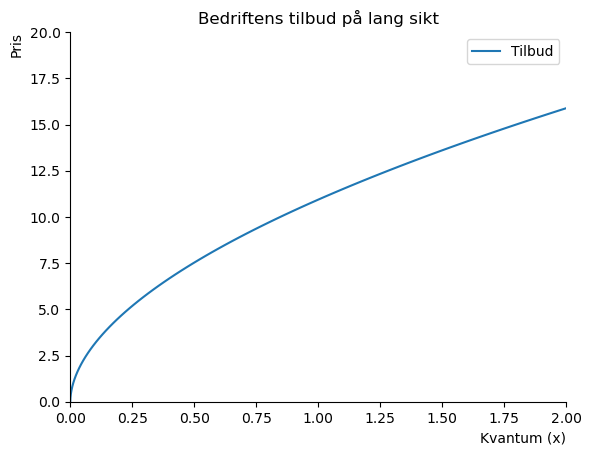

In [15]:
# tilbudsfunksjonen

p_num=np.linspace(0.01,20,100)

fig, ax = plt.subplots()
ax.set_ylabel('Pris', loc='top')
ax.set_xlabel('Kvantum (x)', loc='right')
ax.set(xlim=(0,2))
ax.set(ylim=(0,20))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

ax.plot(x_eq(p_num,.4,.25,3,5),p_num, label = 'Tilbud')



ax.set_title('Bedriftens tilbud på lang sikt')
ax.legend(loc='best');


In [16]:
x_eq(p,.4,.25,3,5)

0.011765837471769*p**1.85714285714286

In [17]:
fortjeneste_eq(p,.4,.25,3,5)

0.00411804311511916*p**2.85714285714286

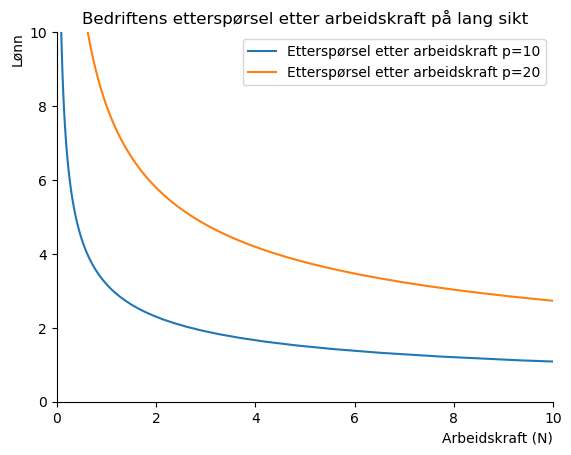

In [18]:
# etterspørsel etter arbeidskraft


w_num=np.linspace(0.01,10,100)

fig, ax = plt.subplots()
ax.set_ylabel('Lønn', loc='top')
ax.set_xlabel('Arbeidskraft (N)', loc='right')
ax.set(xlim=(0,10))
ax.set(ylim=(0,10))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

ax.plot(N_eq(10,.4,.25,w_num,5), w_num, label = 'Etterspørsel etter arbeidskraft p=10')
ax.plot(N_eq(20,.4,.25,w_num,5), w_num, label = 'Etterspørsel etter arbeidskraft p=20')



ax.set_title('Bedriftens etterspørsel etter arbeidskraft på lang sikt')
ax.legend(loc='best');

**Oppgave**        

[Arbeidsgiveravgift](https://www.regjeringen.no/no/tema/kommuner-og-regioner/regional--og-distriktspolitikk/differensiert-arbeidsgiveravgift/id2353986/) må betales av bedrifter til staten basert på lønnsutgifter. Dette er bedriftens bidrag til finansieringen av folketrygden, og satsen som må betales er avhengig av hvor bedriften er lokalisert (differensiert arbeidsgiveravgift). Den generelle arbeidsgiveravgiften i Tromsø kommune er på 7,9% i 2023 og 0% i Alta.

En oppstartsbedrift vurderer å etablere seg i Tromsø eller Alta. Prisen på produktet er 1000 kr per enhet, og bedriften har følgende produktfunksjon uavhengig av beliggenhet:

\begin{equation}
   x = N^.5 K^.25
\end{equation}

Den totale kostnaden på arbeidskraft (dvs inkludert arbeidsgiveravgiften) er 380 kr per time i Alta og 410kr i Tromsø (410=1.079\*380). Kapitalkostnaden er det samme i Tromsø og Alta på 500 kr per enhet. Bedriften har faste driftsavhengige kostnader (leie på produksjonslokaler) på $F_A$ kr i Alta og $F_T$ kr i Tromsø.    
a) Hva er bedriftens fortjenestemaksimerende etterspørsel etter arbeidskraft og kapital på lang sikt dersom den er lokalisert i Tromsø og Alta? Sett dine svar inn i en pen tabell, og forklar dine funn. (For tabellen kan du se i `Forsmak mappe 1.ipynb`).      
b) Regn ut fortjenesten med lokalisering i begge byene. Under hvilke omstendigheter vil bedriften velge å etablere seg i Tromsø på tross av høyere lønnskostnader?       
c) Produktet som bedriften lager omsettes på verdensmarkedet, og man har observert store svingninger i pris den senere tiden. Bedriftens styre vil vite hvor mye som bør produseres til enhver pris på lang sikt når markedet har roet seg. Gjennomfør en analyse av dette for lokaliseringen i Tromsø og Alta, og forklar dine resultater. I beregningen kan du anta $F_T=100, F_A= 100$.   

In [19]:
# Skriv svaret ditt her